In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install mediapipe
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 44.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.34.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 4.25.6 which is incompatible.
google-cloud-bigtable 2.27.0 requires google-api-core[grpc]<3.0.0dev,>=2.16.0, but you have google-api-core 1.34.1 which is incompatible.
pandas-gbq 0.25.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
tensorflow-decision-forests 1.10.0 requires tens

In [20]:
import os
DATA_DIR = "/kaggle/input/synthetic-asl-alphabet/Train_Alphabet"

## MAKE DATA FROM NORMAL IMAGES
def turnImagesToLandmarks(DATA_DIR):
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    
    hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)
    
    
    data = []
    labels = []
    for dir_ in os.listdir(DATA_DIR):
        for img_path in os.listdir(os.path.join(DATA_DIR, dir_))[:30]:
            data_aux = []
    
            x_ = []
            y_ = []
    
            img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
            results = hands.process(img_rgb)
            
            if results.multi_hand_landmarks:
                hand_landmarks = results.multi_hand_landmarks[0]  # Only take the first hand
                x_ = [lm.x for lm in hand_landmarks.landmark]
                y_ = [lm.y for lm in hand_landmarks.landmark]
                data_aux = []
                for i in range(len(hand_landmarks.landmark)):
                    data_aux.append(x_[i] - min(x_))
                    data_aux.append(y_[i] - min(y_))
                data.append(data_aux)
                labels.append(dir_)
        
    return labels, data
    


labels, data = turnImagesToLandmarks(DATA_DIR)
labels, data

(['N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'R',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'I',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'H',
  'H',
  'H',
  'H',

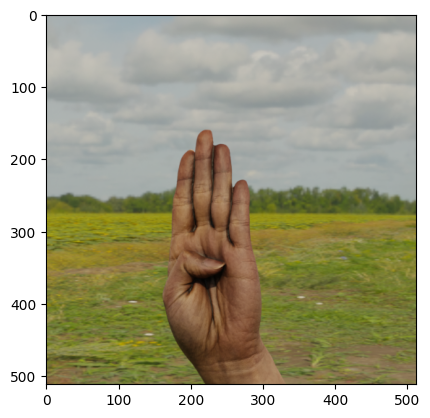

In [41]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)


img = cv2.imread(os.path.join("/kaggle/input/synthetic-asl-alphabet/Test_Alphabet/B/4e8ee3c6-2eef-4f95-9b7f-c8d999f3aa9e.rgb_0000.png"))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)


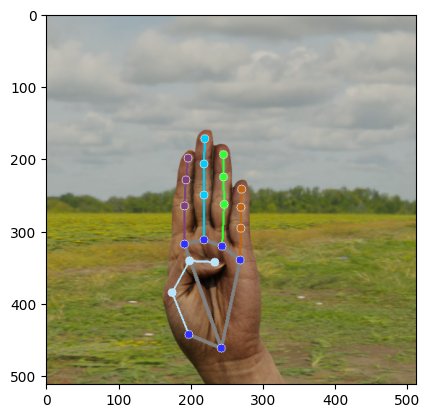

In [42]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hand_landmarks = hands.process(img_rgb)

for landmark in hand_landmarks.multi_hand_landmarks:
    
    mp_drawing.draw_landmarks(
            img_rgb,  # image to draw
            landmark,  # model output
            mp_hands.HAND_CONNECTIONS,  # hand connections
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style()
        )

    plt.imshow(img_rgb)

# Therefore, all of the raw data is here. It's purely the coordinates. 
# x_= [lm.x for lm in hand_landmarks.landmark]
# y_ = [lm.y for lm in hand_landmarks.landmark]


    

In [8]:
import pickle 
f = open('data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

In [22]:
lengths = [len(features) for features in data]
print(set(lengths))  # This should output a single value if all samples are consistent.


{42}


In [23]:
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


# data_dict = pickle.load(open('./data.pickle', 'rb'))

# data = np.asarray(data_dict['data'])
# labels = np.asarray(data_dict['labels'])

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

score = accuracy_score(y_predict, y_test)

print('{}% of samples were classified correctly !'.format(score * 100))

f = open('model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()

93.00699300699301% of samples were classified correctly !
